### Visualizaciones de datos para el dataset Police_Arrests_20240702
En este notebook "03_visualizaciones" se ejecutan codigos para agregar  visualizaciones en función de las variables ya existentes al "df_limpio" con las nuevas variables resultante del notebook "02_creacion_de_variables"

In [239]:
# Importo librerias de python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
# Declaro el dataframe a usar
eccomerce_sales =r'C:\Users\Administrador\OneDrive - udd.cl\Python para la ciencia de datos\proyecto_final\Data\Police_Arrests_20240702.csv'
df = pd.read_csv(eccomerce_sales)

In [241]:
# Replico los pasos claves para llegar a df_limpio
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
df_sin_nulos = df.dropna()
df_limpio= df_sin_nulos.loc[(df_sin_nulos["Subject's age"] <= 80) & (df_sin_nulos["Subject's age"] >= 18)]
# Agrego columnas para año, mes, semana y día de la semana
df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
df_limpio['Week'] = df_limpio['Event Date/Time'].dt.isocalendar().week
df_limpio['Weekday'] = df_limpio['Event Date/Time'].dt.day_name()
bins = [18, 30, 50, float('inf')]
labels = ['Adulto joven', 'Adulto maduro', 'Adulto mayor']
df_limpio['AgeGroup'] = pd.cut(df_limpio["Subject's age"], bins=bins, labels=labels, right=False)

# Verifico df limpio
info = df_limpio.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 16317 entries, 0 to 23509
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     16317 non-null  int64         
 1   Subject's race          16317 non-null  object        
 2   Subject's gender        16317 non-null  object        
 3   Subject's age           16317 non-null  int64         
 4   Ethnicity               16317 non-null  object        
 5   District of occurrence  16317 non-null  float64       
 6   Adjacent to School      16317 non-null  int64         
 7   Assigned Division       16317 non-null  object        
 8   Assigned Bureau         16317 non-null  object        
 9   Event Date/Time         16317 non-null  datetime64[ns]
 10  Year                    16317 non-null  int32         
 11  Month                   16317 non-null  int32         
 12  Week                    16317 non-null  UInt32     

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5152\3399589432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
C:\Users\Administrador\AppData\Local\Temp\ipykernel_5152\3399589432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
C:\Users\Administrador\AppData\Local\Temp\ipykernel_5152\3399589432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Si nos consideramos miembros de la policia y buscamos tomar decisiones basada en datos  
nos interesa concluir respecto:  

`- ¿Cúal ha sido la evolución de casos en el tiempo?`  
`- ¿Cuando ocurrieron más casos?`  
`- ¿Cúal es la división que ha registrado más casos?`

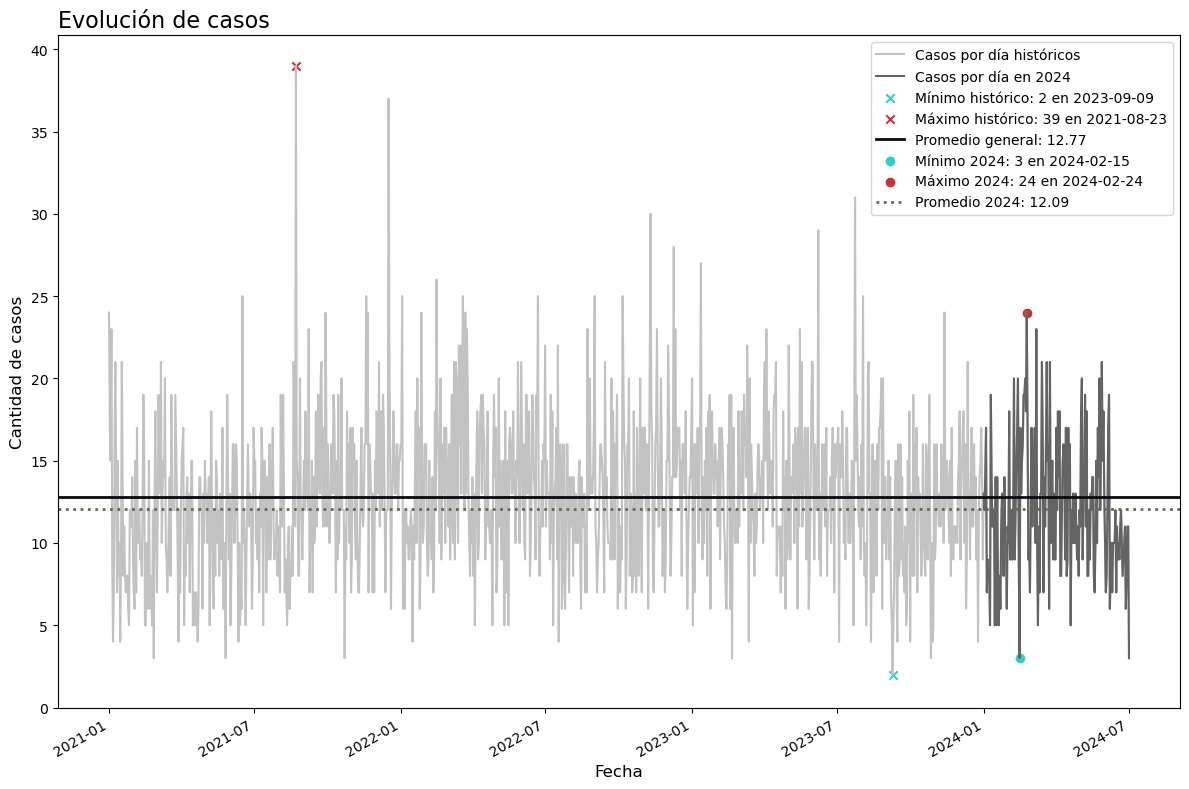

In [242]:
# ¿Cual ha sido la evolución histórica de casos en el tiempo?

#Casos por dia y casos en 2024
casos_por_dia = df_limpio['Event Date/Time'].dt.date.value_counts().sort_index()
df_limpio_2024 = df_limpio[df_limpio['Event Date/Time'].dt.year == 2024] #Por interes  de analisis se genera un filtro al año actual
casos_por_dia_2024 = df_limpio_2024['Event Date/Time'].dt.date.value_counts().sort_index()

# Calculo variables de interes
promedio_casos = casos_por_dia.mean()
min_casos = casos_por_dia.min()
max_casos = casos_por_dia.max()
promedio_casos_2024 = casos_por_dia_2024.mean()
min_casos_2024 = casos_por_dia_2024.min()
max_casos_2024 = casos_por_dia_2024.max()
fecha_min_casos = casos_por_dia[casos_por_dia == min_casos].index[0]
fecha_max_casos = casos_por_dia[casos_por_dia == max_casos].index[0]
fecha_min_casos_2024 = casos_por_dia_2024[casos_por_dia_2024 == min_casos_2024].index[0]
fecha_max_casos_2024 = casos_por_dia_2024[casos_por_dia_2024 == max_casos_2024].index[0]

# Grafico
fig, ax = plt.subplots(figsize=(12, 8))
casos_por_dia.plot(kind='line', color='#c2c2c2', ax=ax, label='Casos por día históricos')
casos_por_dia_2024.plot(kind='line', color='#646464', ax=ax, label='Casos por día en 2024')

# Agrego las variables de interes a la visualización
ax.scatter(fecha_min_casos, min_casos, color='#34cdcb', marker='x', label=f'Mínimo histórico: {min_casos} en {fecha_min_casos}')
ax.scatter(fecha_max_casos, max_casos, color='#cb3234', marker='x', label=f'Máximo histórico: {max_casos} en {fecha_max_casos}')
ax.axhline(promedio_casos, color='#0a0a0a', linestyle='-', linewidth=2, label=f'Promedio general: {promedio_casos:.2f}')
ax.scatter(fecha_min_casos_2024, min_casos_2024, color='#34cdcb', marker='o', label=f'Mínimo 2024: {min_casos_2024} en {fecha_min_casos_2024}')
ax.scatter(fecha_max_casos_2024, max_casos_2024, color='#cb3234', marker='o', label=f'Máximo 2024: {max_casos_2024} en {fecha_max_casos_2024}')
ax.axhline(promedio_casos_2024, color='#6d6552', linestyle=':', linewidth=2, label=f'Promedio 2024: {promedio_casos_2024:.2f}')

# Ajustes para el grafico
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylim(bottom=0)
ax.set_ylabel('Cantidad de casos', fontsize=12)
ax.set_title('Evolución de casos', fontsize=16, loc='left')
fig.autofmt_xdate()
ax.legend()
plt.tight_layout()
plt.show()

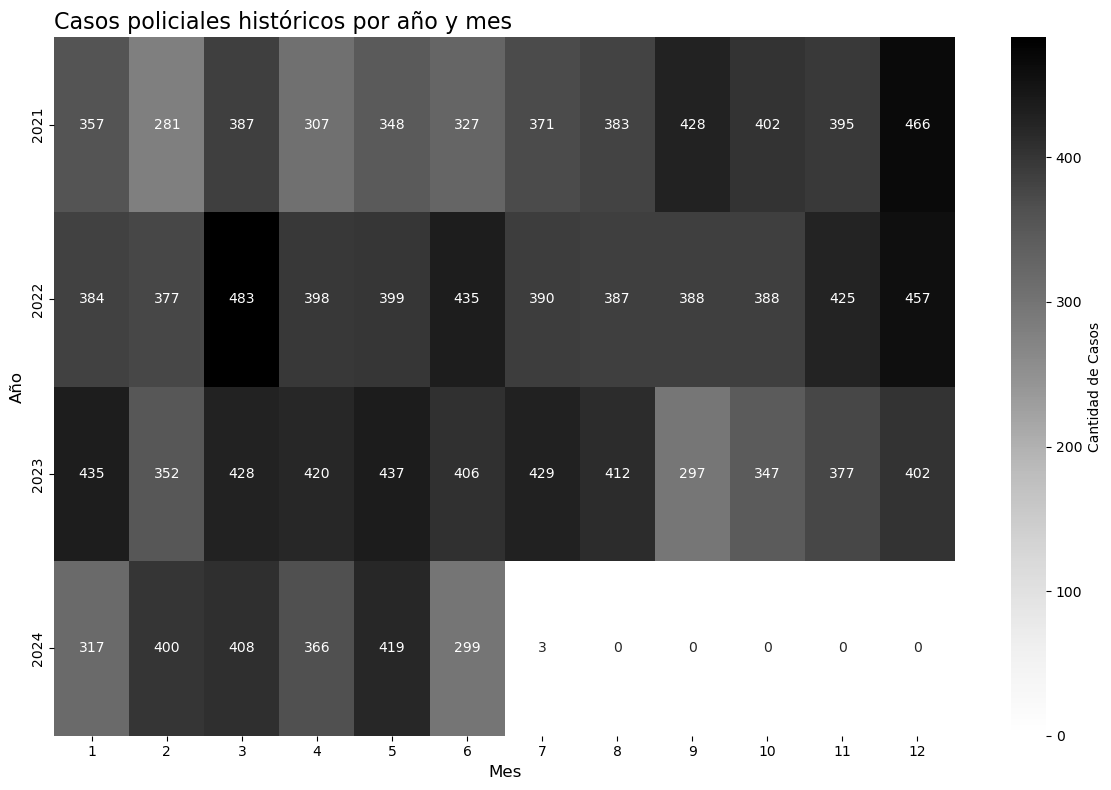

In [117]:
# ¿Cuando ocurrieron más sucesos?

#Casos por mes y año
mapa_de_casos = df_limpio.groupby([df_limpio['Event Date/Time'].dt.year, df_limpio['Event Date/Time'].dt.month]).size().unstack(fill_value=0)

# Grafico
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_de_casos, cmap='Greys', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Casos'})

# Ajustes para el grafico
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Casos policiales históricos por año y mes', fontsize=16, loc='left')
plt.tight_layout()
plt.show()

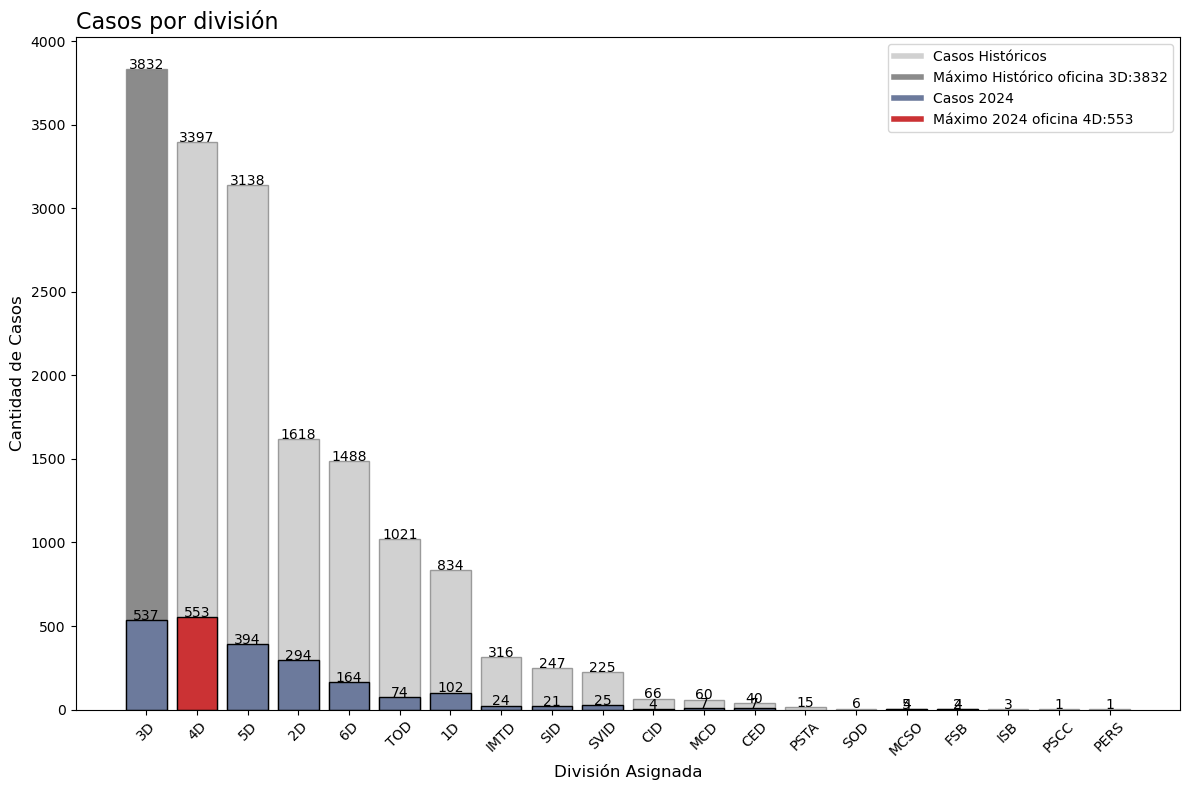

In [248]:
# ¿Cúal es la división que ha registrado más casos?

#Casos por oficina y casos por oficina en 2024
casos_por_division = df_limpio['Assigned Division'].value_counts()
casos_por_division_2024 = df_limpio_2024['Assigned Division'].value_counts()

# Identifico las oficinas con más casos
oficina_max_casos = casos_por_division.idxmax()
max_casos = casos_por_division.max()
oficina_max_casos_2024 = casos_por_division_2024.idxmax()
max_casos_2024 = casos_por_division_2024.max()

# Grafico
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(casos_por_division.index, casos_por_division.values, color='#c2c2c2', edgecolor='grey', label='Casos Históricos', alpha=0.75)
Grafico_barra_2024 = ax.bar(casos_por_division_2024.index, casos_por_division_2024.values, color='#6c7a9c', edgecolor='black', label='Casos 2024')

# Etiquetas y destaco en visualización oficinas con mas casos para la historia y 2024
for barra, oficina in zip(Grafico_barra, casos_por_division.index):
    yval = barra.get_height()
    if oficina == oficina_max_casos:
        barra.set_color('#646464')
        barra.set_edgecolor('grey')
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, f'{yval}', ha='center')
    
for barra, oficina in zip(Grafico_barra_2024, casos_por_division_2024.index):
    yval = barra.get_height()
    if oficina == oficina_max_casos_2024:
        barra.set_color('#cb3234')
        barra.set_edgecolor('black')  
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, f'{yval}', ha='center')

# Ajustes para el grafico
ax.set_xlabel('División Asignada', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por División', fontsize=12, loc='left')
handles = [
    plt.Line2D([0], [0], color='#c2c2c2', lw=4, alpha=0.75),  # Casos Históricos
    plt.Line2D([0], [0], color='#646464', lw=4, alpha=0.75),  # Máximo Histórico
    plt.Line2D([0], [0], color='#6c7a9c', lw=4),  # Casos 2024
    plt.Line2D([0], [0], color='#cb3234', lw=4)   # Máximo 2024
]

labels = [
    'Casos Históricos',
    f'Máximo Histórico oficina {oficina_max_casos}:{max_casos}',
    'Casos 2024',
    f'Máximo 2024 oficina {oficina_max_casos_2024}:{max_casos_2024}'
]

ax.legend(handles=handles, labels=labels, loc='upper right')
plt.xticks(rotation=45)
plt.title('Casos por división', fontsize=16, loc='left')
plt.tight_layout()
plt.show()

### Conclusiones descriptivas  

Para los objetivos de información:  

**- ¿Cúal ha sido la evolución de casos en el tiempo?**

Se logra identificar que el `máximo de casos por día ocurrio en el año 2021 con  39 casos`, lo cual representa, `una disminución en la variación porcentual de un 38% respecto al máximo del año en curso`,con 24 casos. Respecto al promedio de casos por día, `los promedios del año en curso son levemente menor al promedio histórico`, no se logra identificar un patron cicliclo en la temporalidad, se podria mencionar, que los casos policiales no poseen una estacionalidad temporal claramente marcada.  

**- ¿Cuando ocurrieron más casos?** 

El `máximo historico fue el 23/08/2021` con 39 casos, a nivel mensual, `el mes de marzo de 2022` fue el mes cuando `ocurrieron más casos`.  

**- ¿Cúal es la división que ha registrado más casos?**  

La división que ha tenido `más casos históricamente es la "3D"`, pero, para el `año en curso la división "4D"` es la que posee actualmente más casos asignados.

### Dado que la división "4D" posee la mayor cantidad de casos en 2024, se describen los casos policiales de la división más atingente  para el año en curso.

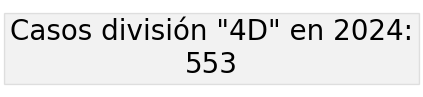

In [249]:
# ¿Cuantos son los casos para la división 4D en 2024? 

# Cantidad de casos para división 4D en 2024
df_4D_2024 = df_limpio[(df_limpio['Assigned Division'] == '4D') & (df_limpio['Event Date/Time'].dt.year == 2024)] 
cantidad_casos_4d_2024 = df_4D_2024['ID Reference Number '].count()

# Grafico
fig, ax = plt.subplots(figsize=(1, 1))
ax.text(0.5,  0.5, 
    f'Casos división "4D" en 2024:\n{cantidad_casos_4d_2024}', 
    ha='center',  
    va='center',  
    fontsize=20,
    bbox=dict(facecolor='grey', alpha=0.1)  
)
# Ajustes para el grafico
ax.axis('off') 
plt.show()

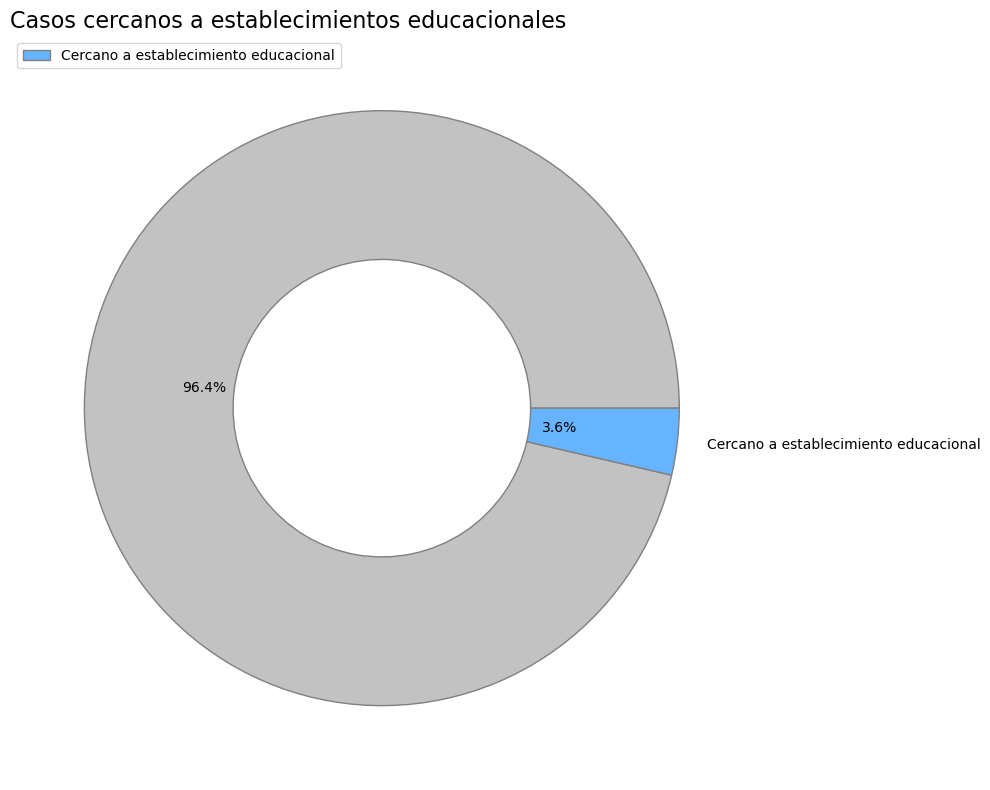

In [250]:
# ¿Son cercanos a establecimientos educacionales?

# Cantidad de casos cercanos a establecimientos
Cercano_establecimieto = df_4D_2024['Adjacent to School'].value_counts()

# Grafico
fig, ax = plt.subplots(figsize=(12, 8))
colores = ['#c2c2c2', '#66b3ff']
labels = ['', 'Cercano a establecimiento educacional']
ax.pie(
    Cercano_establecimieto.values,
    labels=labels,
    colors=colores,
    wedgeprops=dict(width=0.5, edgecolor='grey'),
    autopct=lambda p: f'{p:.1f}%' 
)

# Ajustes para el grafico
ax.set_title('Casos cercanos a establecimientos educacionales', fontsize=16, loc='left')
ax.legend( loc='upper left')
plt.tight_layout()
plt.show()

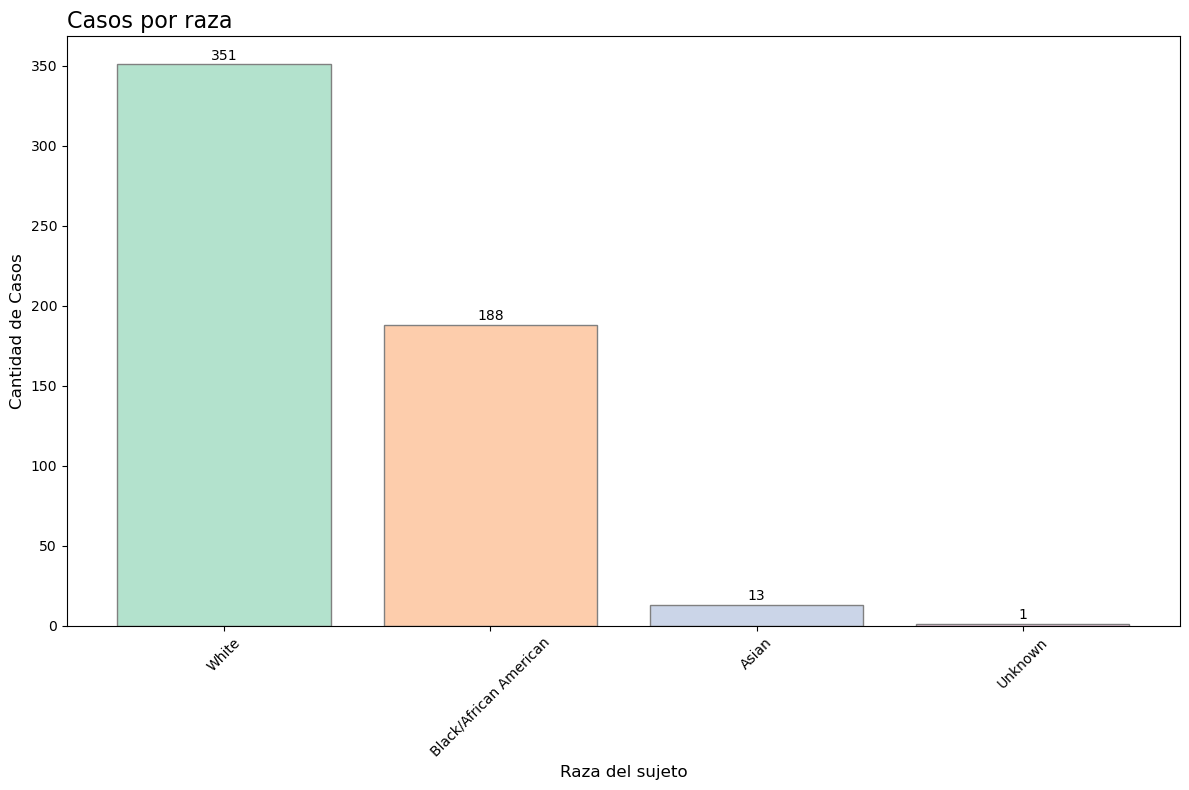

In [251]:
# ¿Cual es la raza con mayor cantidad de casos?

# Cantidad de casos por raza
casos_por_raza = df_4D_2024["Subject's race"].value_counts()

# Variables para color de categoria y su orden
orden_casos_por_raza = casos_por_raza.sort_values(ascending=False).index
colores_raza = sns.color_palette("Pastel2", n_colors=len(orden_casos_por_raza))

# Grafico
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(
    casos_por_raza.index,
    casos_por_raza.values,
    color = colores_raza,
    edgecolor='grey'
    )
# Etiquetas 
for barra in Grafico_barra:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
    
# Ajustes para el grafico
ax.set_xlabel('Raza del sujeto', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por raza', fontsize=16, loc = "left" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Administrador\AppData\Local\Temp\ipykernel_5152\855792378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


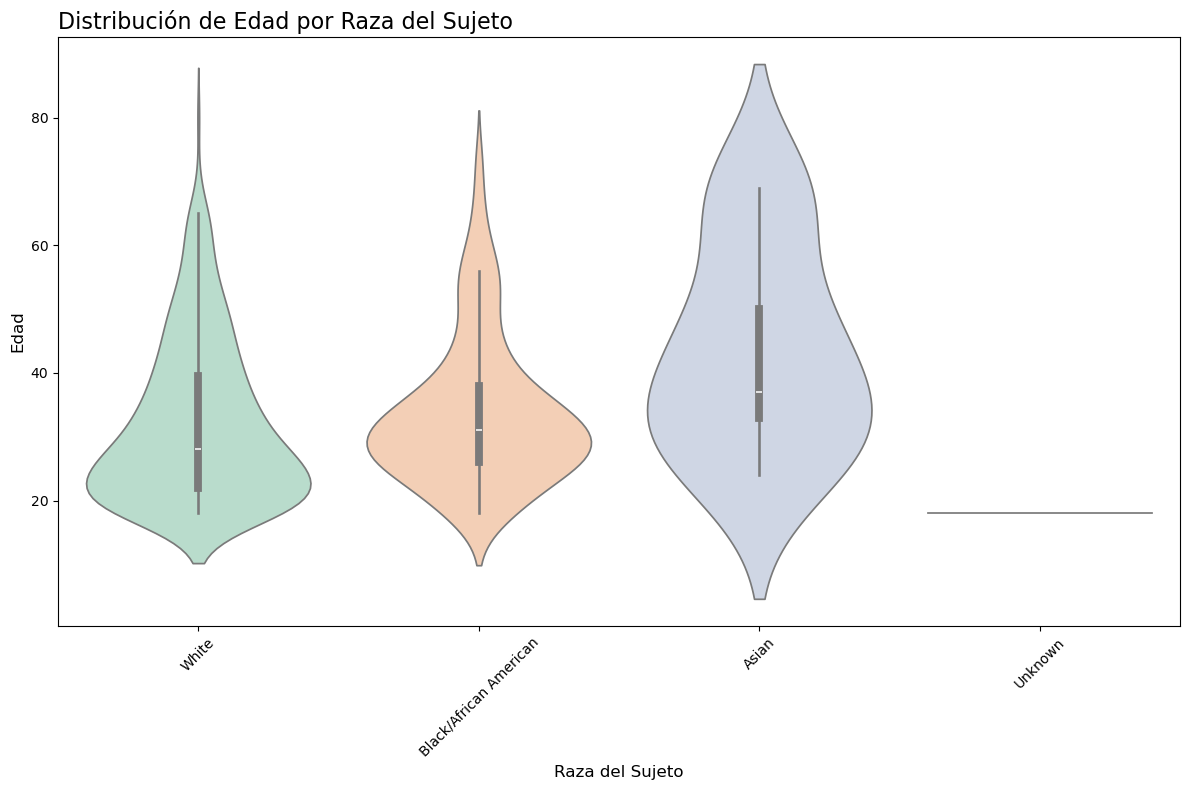

In [252]:
# ¿Cómo es la distribución etaria por raza?

# Grafico
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="Subject's race",
    y="Subject's age",
    data=df_4D_2024,
    order=orden_casos_por_raza,
    palette=colores_raza  
)

# Ajustes para el grafico
plt.xlabel('Raza del Sujeto', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.title('Distribución de Edad por Raza del Sujeto', fontsize=16, loc='left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

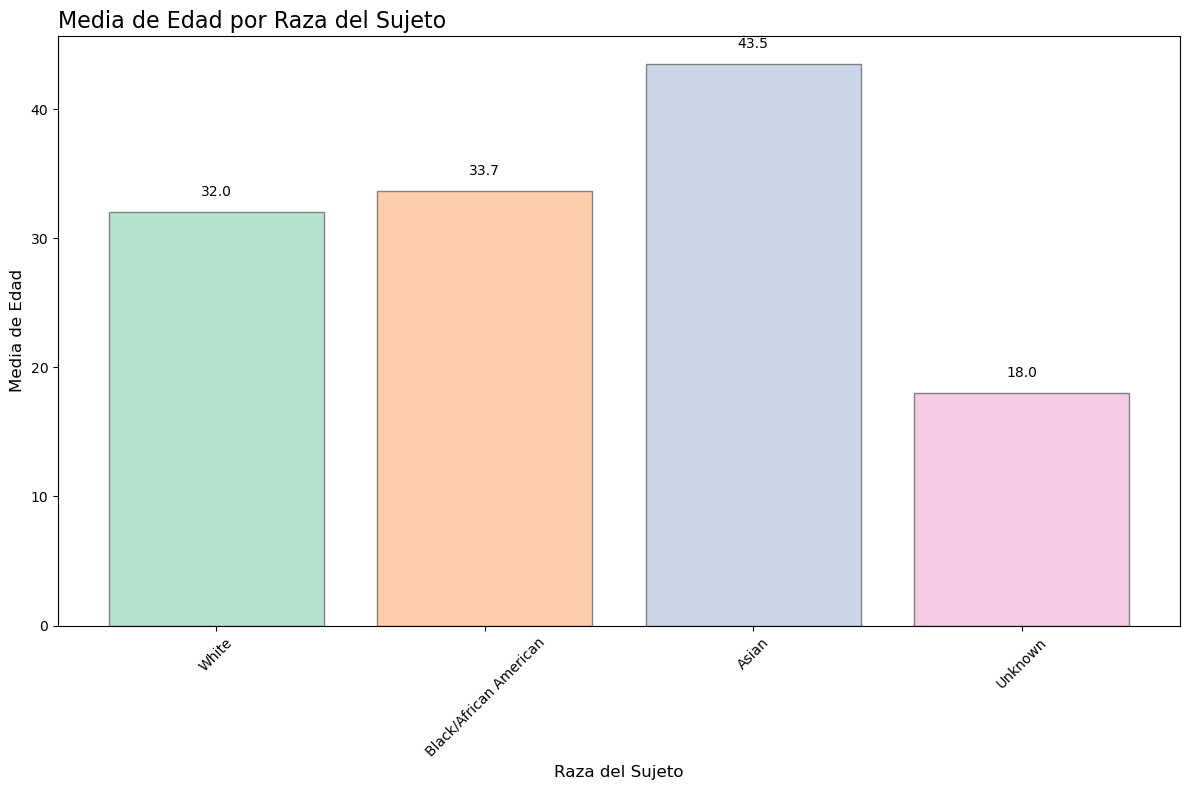

In [253]:
# ¿Cúal es el valor de la media de edad por raza?

# Media de edad para cada raza
media_por_raza = df_4D_2024.groupby("Subject's race")["Subject's age"].mean()
media_por_raza = media_por_raza.loc[orden_casos_por_raza] #orden por cantidad de casos

# Grafico
fig, ax = plt.subplots(figsize=(12, 8))

Grafico_barra = ax.bar(
    media_por_raza.index,
    media_por_raza.values,
    color=colores_raza,
    edgecolor='grey'
)

# Etiquetas
for barra in Grafico_barra:
    yval = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        yval + 1,
        f'{yval:.1f}', 
        ha='center',
        va='bottom'
    )

# Ajustes para el grafico
ax.set_xlabel('Raza del Sujeto', fontsize=12)
ax.set_ylabel('Media de Edad', fontsize=12)
ax.set_title('Media de Edad por Raza del Sujeto', fontsize=16, loc='left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusiones descriptivas para los casos 2024 en la división 4D

Se logra identificar que, solo el `3.6%` de los casos son cercanos a establecimientos educacionales, la `"raza" modal` de los casos corresponden a `"White"`, con `edad media` de `32` años, y una `distribución` mayoritariamente  `menor o cercana a la media muestral` de la división. 